In [15]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])
x = np.mean(data)

print(x, data)

58.0 [56 60 58 55 57 59 61 56 58 60]


In [17]:
with pm.Model() as ambient_noise_model:

    #priors
    mu = pm.Normal("mu", mu=x, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)

    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu, sigma = sigma, observed=data)

    trace_weak = pm.sample(2000, tune=2000, return_inferencedata=True)
    summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
print(summary_weak)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 39 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.003  0.756    56.497     59.469      0.011    0.013    4746.0   
sigma   2.321  0.672     1.309      3.681      0.010    0.013    4465.0   

       ess_tail  r_hat  
mu       3831.0    1.0  
sigma    4463.0    1.0  


In [18]:
mu_hdi = az.hdi(trace_weak.posterior["mu"], hdi_prob=0.95)
sigma_hdi = az.hdi(trace_weak.posterior["sigma"], hdi_prob=0.95)

print(f"\n95% HDI for mu: [{mu_hdi['mu'].values[0]:.3f}, {mu_hdi['mu'].values[1]:.3f}]")
print(f"95% HDI for sigma: [{sigma_hdi['sigma'].values[0]:.3f}, {sigma_hdi['sigma'].values[1]:.3f}]")


95% HDI for mu: [56.497, 59.469]
95% HDI for sigma: [1.309, 3.681]


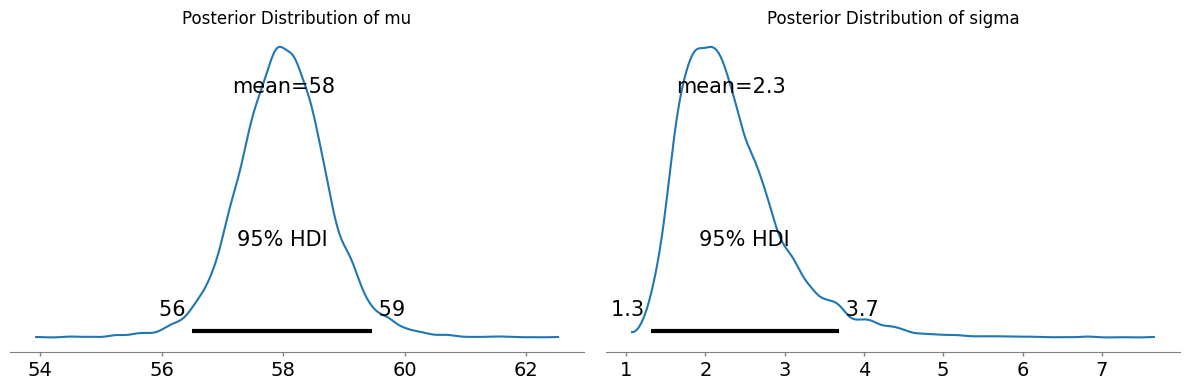

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
az.plot_posterior(trace_weak, var_names=["mu"], hdi_prob=0.95, ax=axes[0])
axes[0].set_title("Posterior Distribution of mu")
az.plot_posterior(trace_weak, var_names=["sigma"], hdi_prob=0.95, ax=axes[1])
axes[1].set_title("Posterior Distribution of sigma")
plt.tight_layout()
plt.show()

In [20]:
#frequentist
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

#Bayesian Posterior
bayesian_mean = np.mean(trace_weak.posterior["mu"].values)
bayesian_std = np.mean(trace_weak.posterior["sigma"].values)

In [21]:
print("Frequentist estimation")
print("Sample mean: ", sample_mean)
print("Sample std: ", sample_std)

print("Bayesian estimation")
print("Bayesian mean: ", bayesian_mean)
print("Bayesian std: ", bayesian_std)

#Difference

print("Difference")
print("Bayesian mean - frequentist mean: ", abs(bayesian_mean - sample_mean))
print("Bayesian std - frequentist std: ", abs(bayesian_std - sample_std))

Frequentist estimation
Sample mean:  58.0
Sample std:  2.0
Bayesian estimation
Bayesian mean:  58.00271475654601
Bayesian std:  2.321352720606944
Difference
Bayesian mean - frequentist mean:  0.002714756546012609
Bayesian std - frequentist std:  0.321352720606944
